In [1]:
!wget https://github.com/daniel-e/mnist_octave/blob/master/mnist.mat?raw=true
import scipy.io
!mv mnist.mat?raw=true mnist.mat
mat = scipy.io.loadmat('mnist.mat')

--2021-10-27 22:16:14--  https://github.com/daniel-e/mnist_octave/blob/master/mnist.mat?raw=true
Resolving github.com (github.com)... 52.69.186.44
Connecting to github.com (github.com)|52.69.186.44|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://github.com/daniel-e/mnist_octave/raw/master/mnist.mat [following]
--2021-10-27 22:16:14--  https://github.com/daniel-e/mnist_octave/raw/master/mnist.mat
Reusing existing connection to github.com:443.
HTTP request sent, awaiting response... 302 Found
Location: https://raw.githubusercontent.com/daniel-e/mnist_octave/master/mnist.mat [following]
--2021-10-27 22:16:14--  https://raw.githubusercontent.com/daniel-e/mnist_octave/master/mnist.mat
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK


In [2]:
import numpy as np
trainX = mat['trainX'] #### train on this 
trainY = np.squeeze(mat['trainY'])

testX = mat['testX'] ### only evaluate on this 
testY = np.squeeze(mat['testY'])


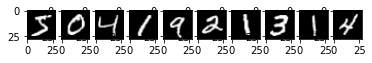

In [3]:
import matplotlib.pyplot as plt

im_ix = 20

fig, ax = plt.subplots(1, 10)

for col in range(10):
  im = trainX[col]
  im = np.reshape(im, (28, 28))
  ax[col].imshow(im, cmap='gray')


In [10]:
import time
from scipy.spatial import distance_matrix


def d(p, q):
  s = 0
  for ix in range(np.size(p)):
    s = s + (p[ix] - q[ix])**2
  return np.sqrt(s)


# number of training examples
nr_train = 10000
nr_test = 999

D = np.zeros((nr_train, nr_test))
t = time.time()

D = distance_matrix(trainX[:nr_train, :], testX[:nr_test, :])

elapsed = time.time() - t
print("Time elapsed:", elapsed)

print(np.shape(D))

Time elapsed: 46.49113750457764
(10000, 999)


In [11]:
# go through every column, and get the index of the smallest value
predictions = np.zeros(nr_test)
for test_ix in range(nr_test):
  smallest_value_index = np.argsort(D[:, test_ix])
  predictions[test_ix] = trainY[smallest_value_index[0]]

predictions = predictions.astype(np.int64)

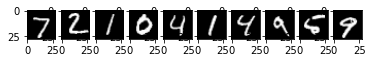

In [6]:
fig, ax = plt.subplots(1, 10)
for col in range(10):
  im = testX[col]
  im = np.reshape(im, (28, 28))
  ax[col].imshow(im, cmap='gray')
  

In [7]:
print("Predictions: ", predictions)
print("Reality: ", testY[:nr_test])

Predictions:  [7 2 1 0 9 1 9 9 5 9 0 6 9 0 1 5 4 7 3 4 9 6 6 5 9 0 7 4 0 1 3 1 3 4 7 2 7
 1 2 1 1 7 4 1 3 5 1 2 4 4 6 3 5 5 6 0 4 1 9 5 7 8 9 3 7 4 6 4 3 0 7 0 2 7
 1 7 3 7 9 7 7 6 2 7 8 4 7 3 6 1 3 6 4 3 1 4 1 7 6 9 6 0 5 4 9 9 2 1 9 4 8
 7 3 9 7 9 4 4 9 2 5 4 7 6 7 9 0 5 8 5 6 6 5 7 8 1 0 1 6 4 6 7 3 1 7 1 8 2
 0 1 9 8 5 5 1 5 6 0 3 4 4 6 5 4 6 5 4 5 1 4 4 7 2 3 2 1 1 8 1 8 1 8 5 0 8
 9 2 5 0 1 1 1 0 4 0 1 1 6 4 2 3 6 1 1 1 3 9 5 2 9 4 5 9 3 9 0 3 6 5 3 7 2
 2 7 1 2 8 4 1 7 3 3 8 7 7 9 2 2 4 1 5 8 8 7 2 6 0 6 4 2 4 1 9 5 7 7 2 1 2
 6 8 5 7 7 9 1 8 1 3 0 3 0 1 9 9 4 1 8 2 1 2 9 7 5 9 2 6 4 1 5 9 2 9 2 0 4
 0 0 2 8 1 7 1 2 4 0 2 7 4 3 3 0 0 3 1 9 6 5 0 5 1 7 9 3 0 4 6 0 7 1 1 2 1
 5 3 3 9 7 8 6 5 4 1 3 8 1 0 5 1 9 1 5 5 6 1 8 5 1 4 4 4 6 2 2 5 0 6 5 6 3
 7 2 0 8 8 5 9 1 1 4 0 7 3 7 6 1 6 2 1 9 2 8 6 1 9 5 2 5 4 4 2 8 3 8 2 4 5
 0 3 1 7 7 3 7 9 7 1 9 2 1 4 2 9 2 0 4 9 1 4 8 1 8 4 5 9 8 8 3 7 6 0 0 3 0
 2 0 6 4 9 3 3 3 2 3 9 1 2 6 8 0 5 6 6 6 7 8 8 2 7 5 8 9 6 1 8 4 1 2 5 3 1
 9 7 5 4 0 

In [8]:
difference = predictions - testY[:nr_test]
percentage_success = (np.sum((difference == 0) * 1) / nr_test) * 100

percentage_success

91.991991991992